# GROMACS 1400k-atom benchmark performance

This notebook compares the performance of the 1400k-atom GROMACS benchmark across different HPC systems.

Performance is measured in ns/day.

## Setup section

Import the required modules and define basic functions for reading the data from GROMACS output files and analysing it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip, sysinfo
from appanalysis import gromacs

In [4]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

plotcores = True
unitlabel = "Nodes"
if plotcores:
    unitlabel = "Cores"

../../../python-modules/utilities/sysinfo.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  systems = yaml.load(input)


## Process data

In [5]:
systems = ['ARCHER','Athena','Cirrus','Thomas','Tesseract','CSD3-Skylake','Isambard','EPCC-CascadeLake']
systems = ['ARCHER','ARCHER2']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../1400k-atoms/results/' + system
    filelist = filemanip.get_filelist(wdir, 'benchmark_')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    gromacs_df = pd.DataFrame(gromacs.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = gromacs.get_perf_stats(gromacs_df, 'max', writestats=True, plot_cores=plotcores)
    print('\n============================================================')


ARCHER
                       Perf                           Count
                        min   median     max     mean   sum
Nodes Cores Threads                                        
1     24    1         1.025   1.0370   1.049   1.0370     2
      48    2         1.199   1.1990   1.216   1.2024     5
2     48    1         2.090   2.0900   2.090   2.0900     1
      96    2         2.432   2.4320   2.432   2.4320     1
4     96    1         3.818   3.8180   3.818   3.8180     1
      192   2         4.256   4.2560   4.256   4.2560     1
8     192   1         7.005   7.0050   7.005   7.0050     1
      384   2         7.447   7.4470   7.447   7.4470     1
16    384   1        10.206  10.2060  10.206  10.2060     1
      768   2        14.195  14.1950  14.195  14.1950     1
32    768   1        17.897  17.8970  17.897  17.8970     1
      1536  2        21.753  21.7530  21.753  21.7530     1
64    1536  1        28.497  28.9945  29.492  28.9945     2
      3072  2        25.542  25.

## Performance comparison

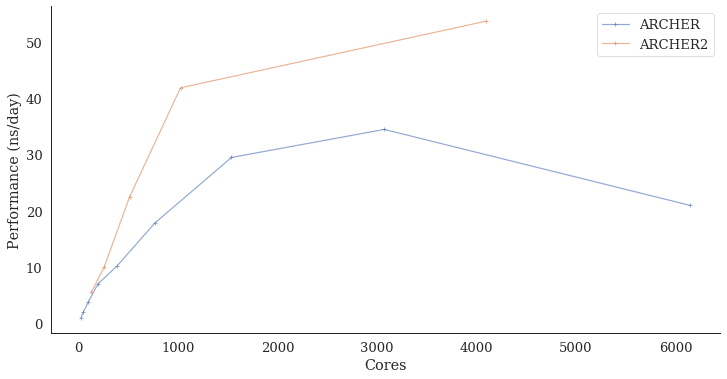

In [8]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
# plt.xlim((0,32))
plt.xlabel(unitlabel)
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()
plt.savefig('GROMACS_1400k_perf.png', dpi=300)

## Performance comparisons

### Single Node

JADE ressults from HEC BioSim. For full details see: http://www.hecbiosim.ac.uk/jade-benchmarks

In [7]:
n_baseperf = perf_max['ARCHER'][0]
c_baseperf = perf_max['ARCHER'][0]/cpn['ARCHER']

print("Performance improvement relative to ARCHER:\n")
print("{:>30s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement'))
print("{:>30s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("Single node")
for system in systems:
    print("{:>30s} {:>15.3f} {:>15.3f}".format(system, perf_max[system][0], perf_max[system][0]/n_baseperf))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (5 core, 1 GPU)", 1.647, 1.647/n_baseperf, "http://www.hecbiosim.ac.uk/jade-benchmarks"))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (20 core, 4 GPU)", 1.469, 1.496/n_baseperf, "http://www.hecbiosim.ac.uk/jade-benchmarks"))

print("\n")

print("per-core")
for system in systems:
    cperf = perf_max[system][0]/cpn[system]
    print("{:>30s} {:>15.3f} {:>15.3f}".format(system, cperf, cperf/c_baseperf))

Performance improvement relative to ARCHER:

                        System   Perf (ns/day)     Improvement
                        ======   =============     ===========
Single node
                        ARCHER           1.049           1.000
                       ARCHER2           5.581           5.320
          JADE (5 core, 1 GPU)           1.647           1.570    http://www.hecbiosim.ac.uk/jade-benchmarks
         JADE (20 core, 4 GPU)           1.469           1.426    http://www.hecbiosim.ac.uk/jade-benchmarks


per-core
                        ARCHER           0.044           1.000
                       ARCHER2           0.044           0.998
